Import Library

In [289]:
import os
import cv2
import numpy as np
from tabulate import tabulate
from sklearn import preprocessing
from skimage.feature import graycomatrix, graycoprops

Directory

In [290]:
image_directory_training="../Dataset/augmentation_image/5_label/dataset_training"
image_directory_testing="../Dataset/augmentation_image/5_label/DataSet_Testing"

Inisialisasi Property Histogram

In [291]:
bins = 16

Ekstraksi Fitur RGB

In [292]:
def ef_rgb_training(image_directory_training):

   # membuat list untuk menyimpan hasil ekstraksi fitur
  features_training = []

  # melakukan ekstraksi fitur pada setiap folder
  for a, (root, dirs, files) in enumerate(os.walk(image_directory_training), start=0):

    # mengambil semua file gambar di dalam folder
    image_files = [f for f in files if f.endswith('.jpg')]

    # melakukan ekstraksi fitur pada setiap gambar
    for image_file in image_files:
      # membaca gambar
      image = cv2.imread(os.path.join(root, image_file))

      # Konversi gambar ke ruang warna rgb
      rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

      r, g, b = cv2.split(rgb_image)  # Pisahkan channel R, G, dan B

      # Hitung histogram untuk channel H
      hist_r = cv2.calcHist([r], [0], None, [bins], [0, 256])
      hist_r = np.ravel(hist_r)  # Mengubah histogram H menjadi array 1 dimensi

      # Hitung histogram untuk channel S
      hist_g = cv2.calcHist([g], [0], None, [bins], [0, 256])
      hist_g = np.ravel(hist_g)  # Mengubah histogram S menjadi array 1 dimensi

      # Hitung histogram untuk channel V
      hist_b = cv2.calcHist([b], [0], None, [bins], [0, 256])
      hist_b = np.ravel(hist_b)  # Mengubah histogram V menjadi array 1 dimensi
      
      # menambahkan nilai rgb ke dalam list
      features_training.append([*hist_r, *hist_g, *hist_b, a])
      
  return features_training


def ef_rgb_testing(image_directory_testing):

   # membuat list untuk menyimpan hasil ekstraksi fitur
  features_testing = []

  # melakukan ekstraksi fitur pada setiap folder
  for a, (root, dirs, files) in enumerate(os.walk(image_directory_testing), start=0):

    # mengambil semua file gambar di dalam folder
    image_files = [f for f in files if f.endswith('.jpg')]

    # melakukan ekstraksi fitur pada setiap gambar
    for image_file in image_files:
      # membaca gambar
      image = cv2.imread(os.path.join(root, image_file))
      
      # Konversi gambar ke ruang warna rgb
      rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

      r, g, b = cv2.split(rgb_image)  # Pisahkan channel R, G, dan B

      # Hitung histogram untuk channel H
      hist_r = cv2.calcHist([r], [0], None, [bins], [0, 256])
      hist_r = np.ravel(hist_r)  # Mengubah histogram H menjadi array 1 dimensi

      # Hitung histogram untuk channel S
      hist_g = cv2.calcHist([g], [0], None, [bins], [0, 256])
      hist_g = np.ravel(hist_g)  # Mengubah histogram S menjadi array 1 dimensi

      # Hitung histogram untuk channel V
      hist_b = cv2.calcHist([b], [0], None, [bins], [0, 256])
      hist_b = np.ravel(hist_b)  # Mengubah histogram V menjadi array 1 dimensi

      # menambahkan nilai rgb ke dalam list
      features_testing.append([*hist_r, *hist_g, *hist_b, a])
      
  return features_testing

Inisialisasi Data Training

In [293]:
#NORMALISASI DATA
extraction_feature = ef_rgb_training(image_directory_training)
data = [data[:-1] for data in extraction_feature]
label = [data[-1] for data in extraction_feature]

normalization_data = preprocessing.normalize(data, norm="l2")

# Menggabungkan data dan label
train_data = []
for data, label in zip(normalization_data, label):
    # Mengambil nilai fitur berdasarkan indeks
    feature_values = [data[i] for i in range(len(data))]
    result_row = feature_values + [label]
    train_data.append(result_row)

In [294]:
# train_data = ef_rgb_training(image_directory_training)

In [295]:
# header tabel rgb
header = ['hist_r' + str(i+1) for i in range(bins)] + ['hist_g' + str(i+1) for i in range(bins)] + ['hist_b' + str(i+1) for i in range(bins)] + ['label']

# Mencetak tabel menggunakan tabulate
print(tabulate(train_data, headers=header, tablefmt="grid"))

+-------------+-------------+-------------+-----------+-----------+------------+------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+------------+------------+-------------+-------------+-------------+-------------+-------------+-----------+-----------+------------+------------+-------------+-------------+-------------+-------------+-------------+------------+------------+------------+-----------+------------+------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+------------+------------+---------+
|     hist_r1 |     hist_r2 |     hist_r3 |   hist_r4 |   hist_r5 |    hist_r6 |    hist_r7 |     hist_r8 |     hist_r9 |    hist_r10 |    hist_r11 |    hist_r12 |    hist_r13 |    hist_r14 |   hist_r15 |   hist_r16 |     hist_g1 |     hist_g2 |     hist_g3 |     hist_g4 |     hist_g5 |   hist_g6 |   hist_g7 |    hist_g8 |    hist_g9 |  

Inisialisasi Data Testing

In [296]:
#NORMALISASI DATA
extraction_feature = ef_rgb_testing(image_directory_testing)
data = [data[:-1] for data in extraction_feature]
label = [data[-1] for data in extraction_feature]

normalization_data = preprocessing.normalize(data, norm="l2")

# Menggabungkan data dan label
test_data = []
for data, label in zip(normalization_data, label):
    # Mengambil nilai fitur berdasarkan indeks
    feature_values = [data[i] for i in range(len(data))]
    result_row = feature_values + [label]
    test_data.append(result_row)

In [297]:
# test_data = ef_rgb_testing(image_directory_testing)

In [298]:
# header tabel rgb
header = ['hist_r' + str(i+1) for i in range(bins)] + ['hist_g' + str(i+1) for i in range(bins)] + ['hist_b' + str(i+1) for i in range(bins)] + ['label']

# Mencetak tabel menggunakan tabulate
print(tabulate(test_data, headers=header, tablefmt="grid"))

+-------------+-------------+------------+-----------+------------+------------+------------+------------+-------------+-------------+-------------+-------------+-------------+-------------+------------+------------+-------------+-------------+-------------+-------------+------------+-----------+-----------+------------+------------+------------+-------------+-------------+-------------+-------------+------------+------------+-------------+------------+------------+------------+------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+------------+------------+---------+
|     hist_r1 |     hist_r2 |    hist_r3 |   hist_r4 |    hist_r5 |    hist_r6 |    hist_r7 |    hist_r8 |     hist_r9 |    hist_r10 |    hist_r11 |    hist_r12 |    hist_r13 |    hist_r14 |   hist_r15 |   hist_r16 |     hist_g1 |     hist_g2 |     hist_g3 |     hist_g4 |    hist_g5 |   hist_g6 |   hist_g7 |    hist_g8 |    hist_g9 |   his

Klasifikasi Model Naive Bayes

In [299]:
X_train = [data[:-1] for data in train_data]
y_train = [data[-1] for data in train_data ]

In [300]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [301]:
X_test = [data[:-1] for data in test_data]
y_true = [data[-1] for data in test_data]

In [302]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3,
       3, 1, 1, 1, 1, 1, 1, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 2, 2, 5, 2, 2, 2, 5, 2, 2, 2, 5, 5, 5, 5, 5, 5, 4,
       5, 5, 4, 5, 4, 5])

In [303]:
# Menggabungkan data uji dan hasil prediksi
result_table = []
for data, pred in zip(test_data, y_pred):
    # Mengambil nilai fitur berdasarkan indeks
    feature_values = [data[i] for i in range(len(data))]
    result_row = feature_values + [pred]
    result_table.append(result_row)

# header tabel rgb
header = ['hist_h' + str(i+1) for i in range(bins)] + ['hist_s' + str(i+1) for i in range(bins)] + ['hist_v' + str(i+1) for i in range(bins)] + ['label'] +['Predict']

# Mencetak tabel menggunakan tabulate
print(tabulate(result_table, headers=header, tablefmt="grid"))

+-------------+-------------+------------+-----------+------------+------------+------------+------------+-------------+-------------+-------------+-------------+-------------+-------------+------------+------------+-------------+-------------+-------------+-------------+------------+-----------+-----------+------------+------------+------------+-------------+-------------+-------------+-------------+------------+------------+-------------+------------+------------+------------+------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+------------+------------+---------+-----------+
|     hist_h1 |     hist_h2 |    hist_h3 |   hist_h4 |    hist_h5 |    hist_h6 |    hist_h7 |    hist_h8 |     hist_h9 |    hist_h10 |    hist_h11 |    hist_h12 |    hist_h13 |    hist_h14 |   hist_h15 |   hist_h16 |     hist_s1 |     hist_s2 |     hist_s3 |     hist_s4 |    hist_s5 |   hist_s6 |   hist_s7 |    hist_s8 |    his

In [304]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           1       0.80      1.00      0.89        32
           2       0.80      1.00      0.89        32
           3       1.00      0.75      0.86        32
           4       0.91      1.00      0.96        32
           5       1.00      0.66      0.79        32

    accuracy                           0.88       160
   macro avg       0.90      0.88      0.88       160
weighted avg       0.90      0.88      0.88       160



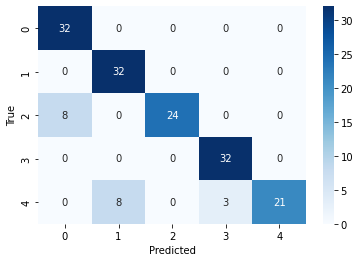

In [305]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# menghitung confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)

sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [306]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.88125
